___
# <font color=#00FF77> CMSE 830</font>
## <font color=#00FF88> HW #4</font>

____



### Name: Pranit Ahuja

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interrupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist student who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data!

✍🏻 For this problem, do **not** use a library to compute the KDE - do it yourself using basic Python. Your plot will be similar to the one above. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)
* compute the percentage tip from the data, and store those values in an array
* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset
* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`
* from this plot, do you think that tips are normally distributed? why or why not?
* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _p_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,p) = \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)
* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will be a rug plot,
* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?
* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)
* if you make your width _w_ too large, does the KDE predict anything impossible?
* finally, answer the question: do you think this is a normal distribution? Would you arrive at a different conclusion depending on which width _w_ you pick? What is your conclusion to the original conversation in the restaurant? Do you see outliers? (Put discussion in a markdown cell.)



_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


In [35]:
#importing packages
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Loading tips dataset
df_tips = sns.load_dataset("tips")

#Creating tips percentage array using numpy
tips_percentage = np.array(df_tips["tip"]*100/df_tips["total_bill"])
tips_percentage

array([ 5.94467334, 16.05415861, 16.65873394, 13.97804054, 14.68076454,
       18.62396204, 22.8050171 , 11.60714286, 13.03191489, 21.85385656,
       16.65043817, 14.18037436, 10.18158236, 16.27780792, 20.36412677,
       18.16496756, 16.16650532, 22.77470841, 20.6246317 , 16.22276029,
       22.76785714, 13.55347462, 14.14077362, 19.22881786, 16.0443996 ,
       13.13868613, 14.95886313, 15.76044129, 19.8156682 , 15.26717557,
       15.18324607, 13.6239782 , 19.92031873, 11.84146931, 18.39145107,
       14.96259352, 12.2624157 , 18.13349084, 12.35955056, 15.98976655,
       13.96508728, 14.54753723, 21.95121951, 13.63636364, 18.42105263,
       16.40240569, 22.49212776, 18.51851852,  7.18038529, 16.62971175,
       19.93620415, 25.26724976, 14.93823614, 15.69416499, 16.97965571,
       18.00923551,  7.89265983,  5.67966679, 15.65836299, 13.94240729,
       15.82060128, 14.48225923, 17.96733212, 20.55768179, 15.00852757,
       15.687251  , 15.01519757, 32.5732899 ,  9.935739  , 13.92

<Figure size 2000x500 with 0 Axes>

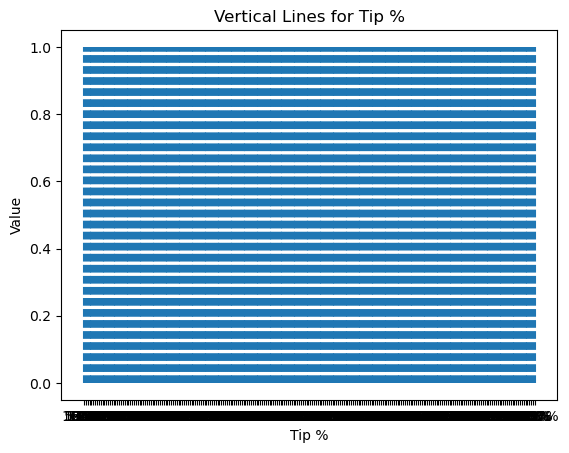

In [36]:
plt.figure(figsize=(20,5))
x_values = np.arange(len(tips_percentage))

fig, ax = plt.subplots()

ax.vlines(x_values, ymin=0, ymax=1, linestyle='--')
ax.set_xticks(x_values)
ax.set_xticklabels([f'{p * 100:.0f}%' for p in tips_percentage])
ax.set_xlabel('Tip %')
ax.set_ylabel('Value')
ax.set_title('Vertical Lines for Tip %')

plt.show()

#### Q: From this plot, do you think that tips are normally distributed? why or why not?
* This plot doesn't tell if tips are normally distributed so we need kde plots.

In [39]:
def my_kde(x_vals, tips, width):
  kde = np.zeros(len(x_vals))
  for tip in tips:
    kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)
  return kde

<Figure size 3000x500 with 0 Axes>

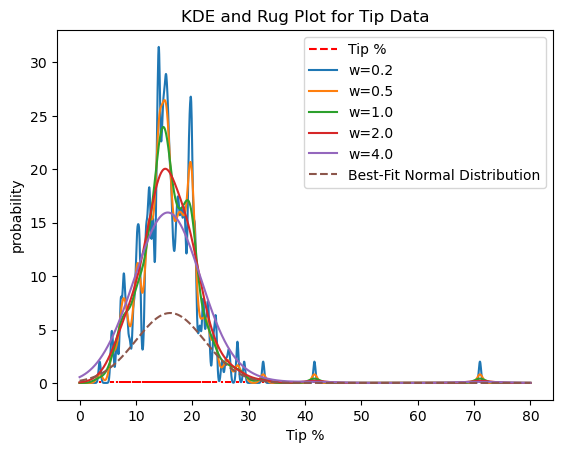

In [42]:
plt.figure(figsize=(30,5))
# Define x values
x_values = np.linspace(0, 80, 2000)

fig, ax = plt.subplots()

# Plot vertical lines for each tip %
ax.vlines(tips_percentage, ymin=0, ymax=0.2, color='red', linestyle='--', label='Tip %')

# Trying different values of kernel width
widths = [0.2, 0.5, 1.0, 2.0, 4.0]
for w in widths:
    #plt.plot(x_values, my_kde(x_values, tips_percentage, 0.5), label=f'w={w}')
    kde_values = my_kde(x_values, tips_percentage, w)
    ax.plot(x_values, kde_values, label=f'w={w}')
    
# Calculate the mean and standard deviation of tip %
mean_tip = np.mean(tips_percentage)
std_tip = np.std(tips_percentage)

# Plot the best-fit normal distribution
normal_dist = 100 * np.exp(-(x_values - mean_tip)**2 / (2 * std_tip**2)) / (std_tip * np.sqrt(2 * np.pi))
ax.plot(x_values, normal_dist, label='Best-Fit Normal Distribution', linestyle='--')

# Set axis labels and a title
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("Tip %")
plt.ylabel("probability")

ax.legend()
plt.show()

#### Q- if you make your width w too large, does the KDE predict anything impossible?      
* Making the width too large in KDE can lead to over-smoothing, predictions extending beyond the observed data, and the loss of local information.

#### Q- Do you think this is a normal distribution?  
* The dataset's tip percentages do not have a perfectly normal distribution. The KDE and the normal distribution have different variances, especially in the tails.

#### Q- Would you arrive at a different conclusion depending on which width w you pick?
* The kernel width can have a major impact on the shape of the KDE. A smaller width produces a narrower and more sensitive KDE, which might highlight noise or outliers. While, a greater width smoothes the KDE and may oversimplify the distribution.

#### Q - What is your conclusion to the original conversation in the restaurant?
* Based on the analysis, it is difficult to tell if the tip percentages follow a normal distribution, it can be influenced by the choice of width. If we take a small width, the KDE may exhibit more fluctuations and may not resemble a normal distribution. While, a larger width may make the KDE appear more normal-like.

#### Q- Do you see outliers?  
* No

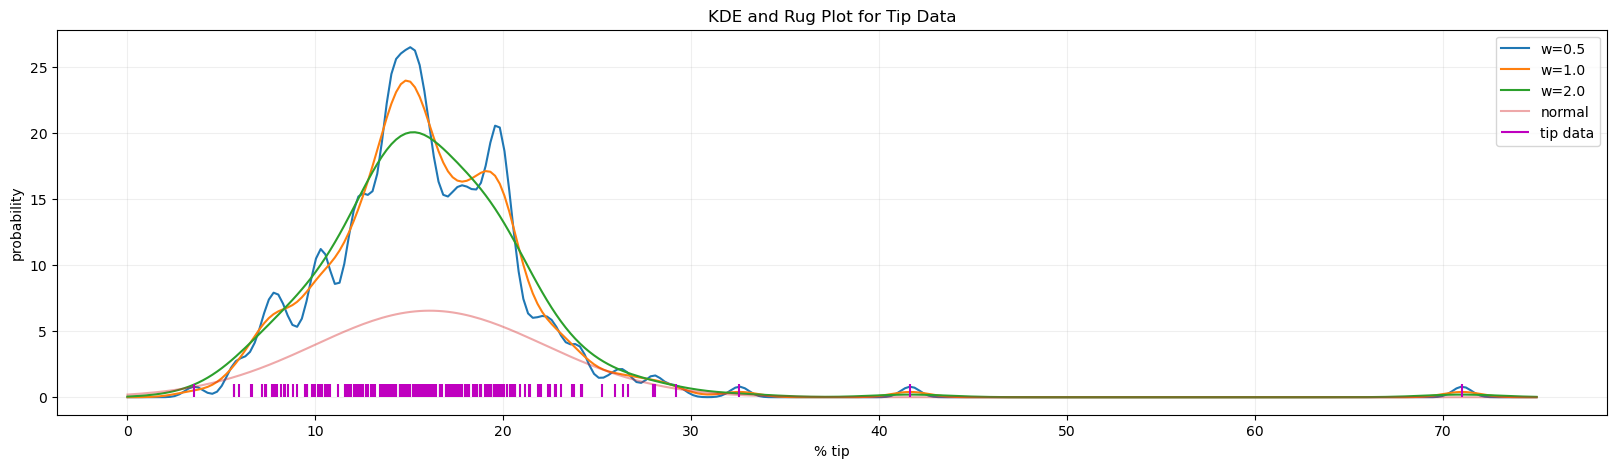

In [43]:
plt.figure(figsize=(20,5))

df = sns.load_dataset("tips")
tip_perc = np.array(df["tip"]/df["total_bill"])*100


def my_kde(x_vals, tips, width):

  kde = np.zeros(len(x_vals))

  for tip in tips:

    kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

  return kde

x_vals = np.linspace(0,75, 300)

plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='normal')

# rug plot
plt.vlines(tip_perc, 0, 1, 'm', label='tip data')

plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### <font color=#839383>_choosing a topic for your project_</font>

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project.

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story.

Last week you examined several datasets that might be useful for your project. For this HW problem, you can use what you did last week; or, this is the time to choose different datasets if you didn't find last week's interesting or useful. After this week, you should decide on a dataset and stick with it at least through the midterm project.


✍🏻 In a markdown cell below, answer these questions:
* from a set of at least three datasets, discuss what they reveal to you,
* what is interesting about these datasets from a science point of view?,
* what is interesting about these datasets from a _data_ science point of view?
* you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?,
* you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

Based on these steps, which of the datasets is the more interesting to you for your project and why?

The goal is for you to decide on a topic and know that it will be usable. Very often we have a project in mind for which there is no dataset available that allows us to do what we want. This is the time to ensure, through EDA on several datasets, that our project is realistic.

If you choose one of the more common and simple datasets, such as MPG, Penguin or Iris, you need to have a very compelling reason for your choice. There is already a lot known on the web about these datasets and there is very little new you can do with them. 

### Bank Dataset: -
This dataset includes information about client demographics, previous marketing interactions, and whether the client subscribed to a term deposit (the target variable).

* Data Science Perspective: From a data science perspective this dataset provides valuable information for better marketing strategies and target audience. It can also be used to train machine learning models such as Logistic Regression to predict whether a particular customer will opt for the deposit or not.

* Web App: A web app from this dataset could tell users about what marketing strategies could be better for similar situations and which audience groups to target.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing dataset
bank_df = pd.read_csv("bank/bank.csv", delimiter=";", skiprows=0)
bank_df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [4]:
bank_df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [5]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

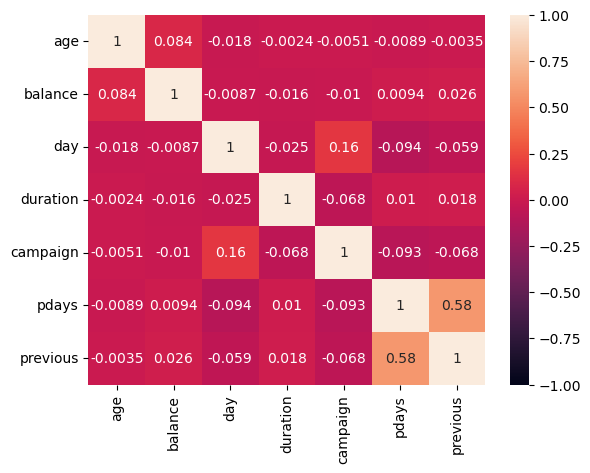

In [6]:
sns.heatmap(bank_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

/Users/pranitahuja/anaconda3/envs/cmse830/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


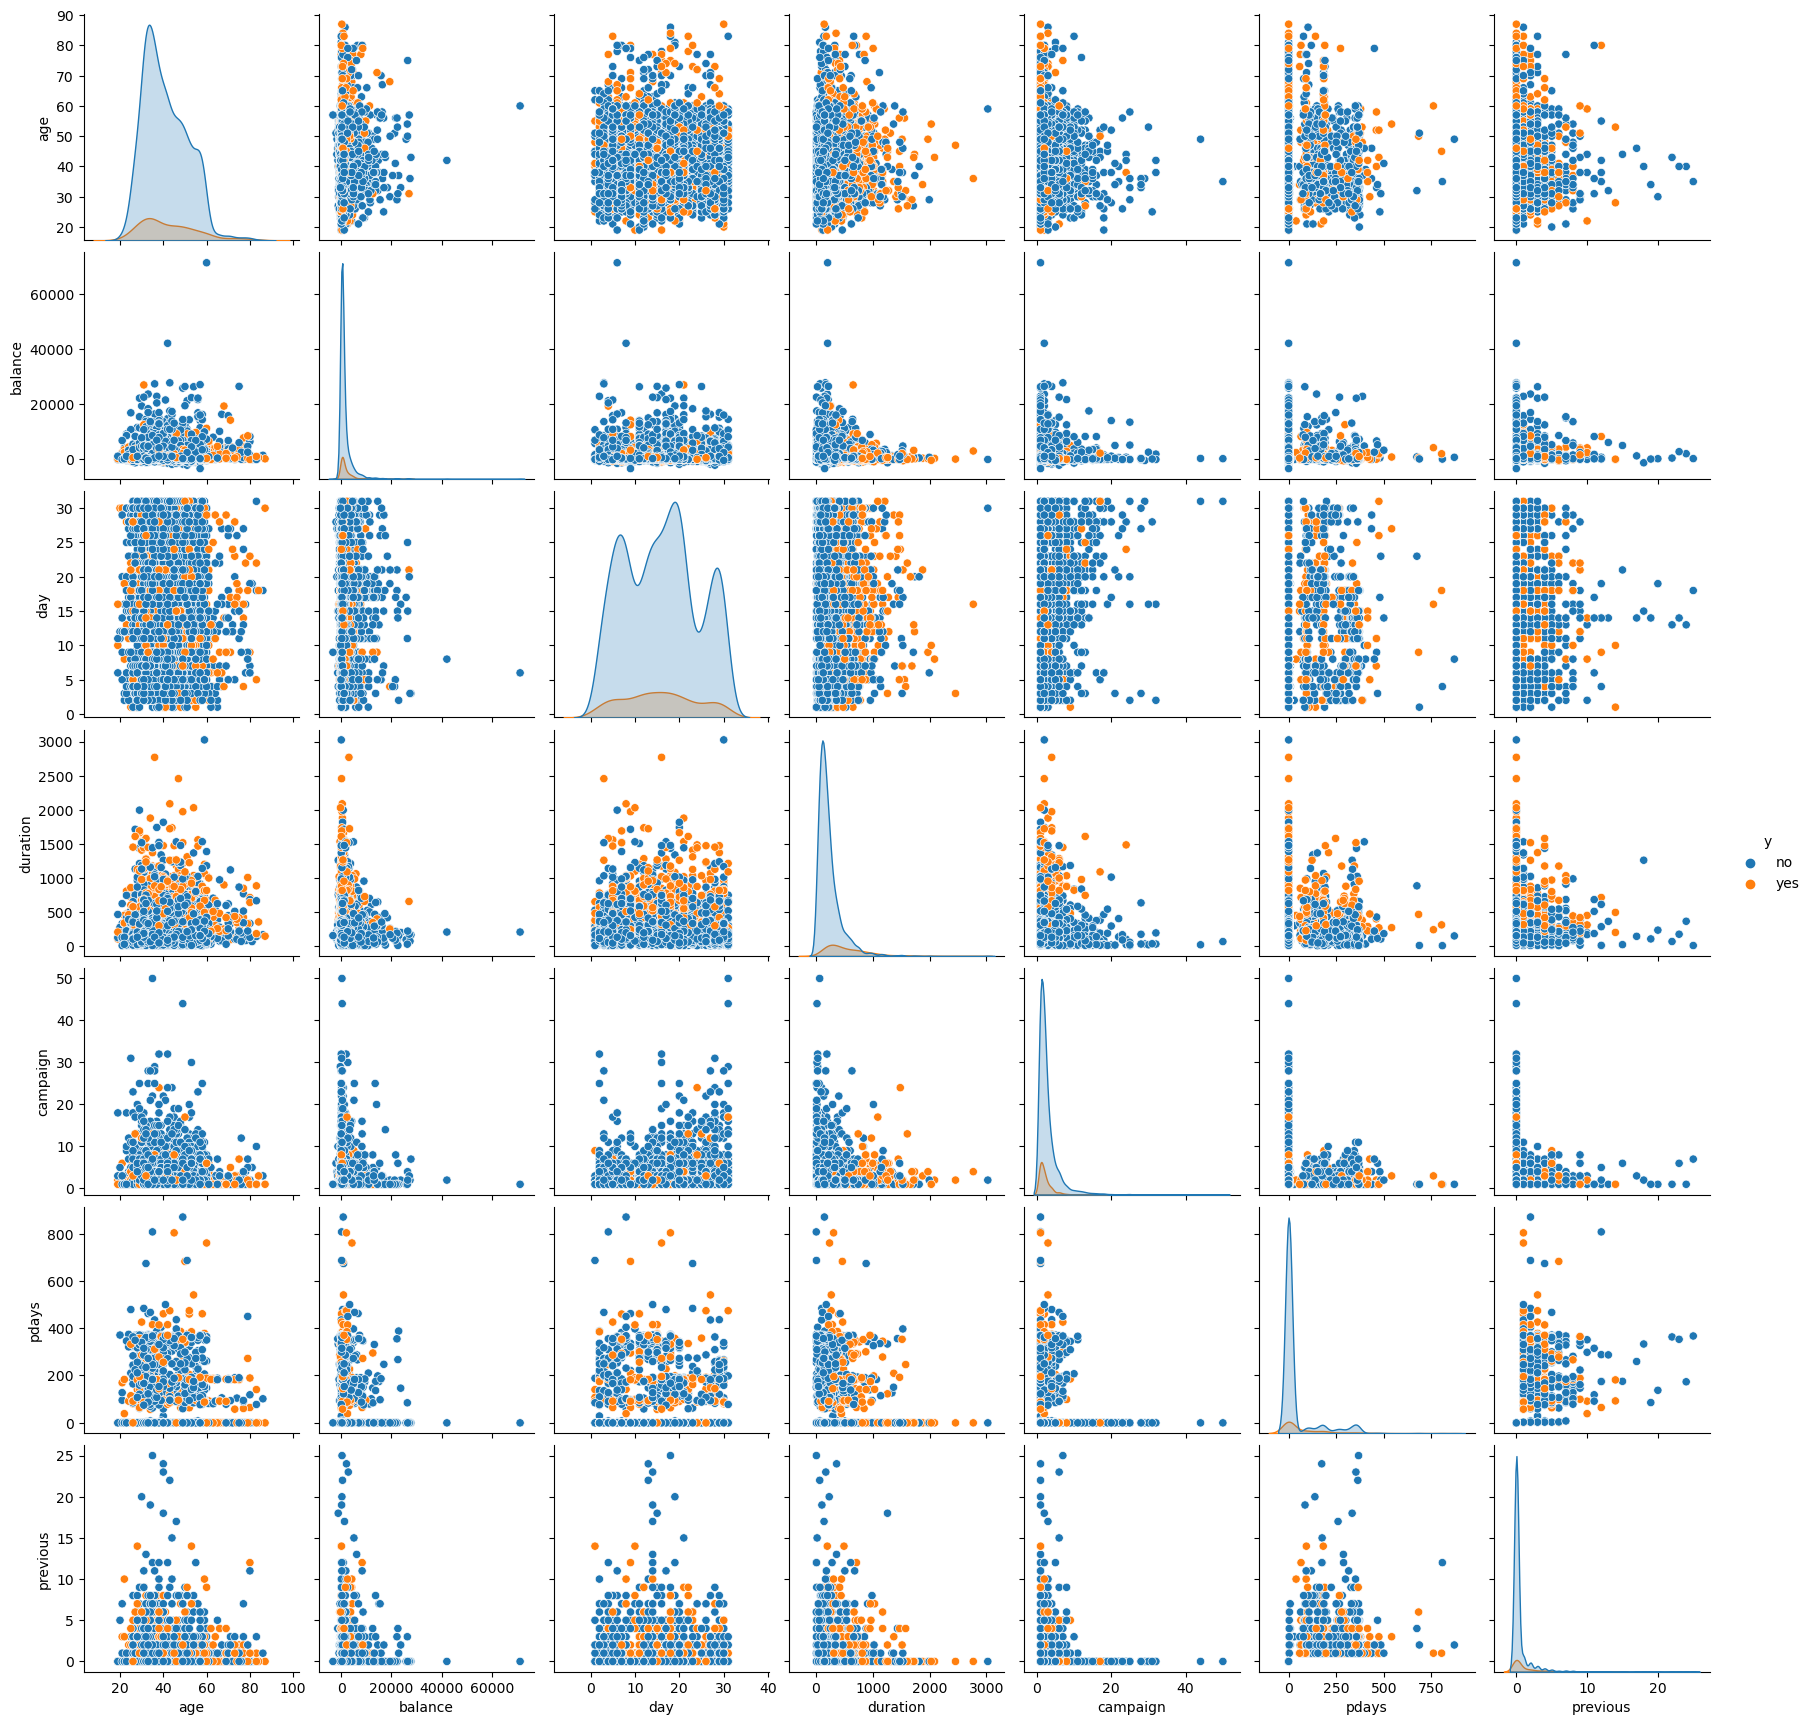

In [7]:
sns.pairplot(data=bank_df, hue='y')

<Axes: xlabel='y', ylabel='count'>

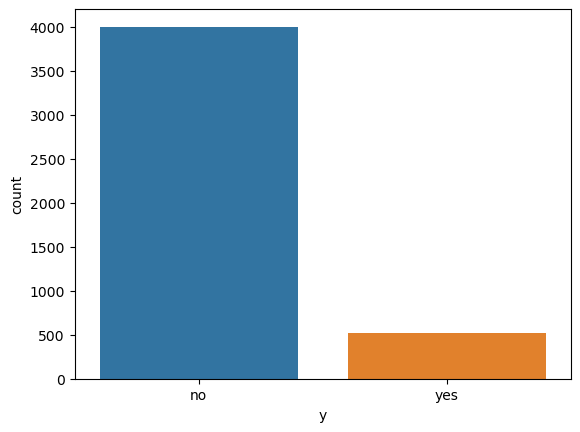

In [8]:
# Getting counts of yes and no
sns.countplot(x=bank_df['y'])

/Users/pranitahuja/anaconda3/envs/cmse830/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


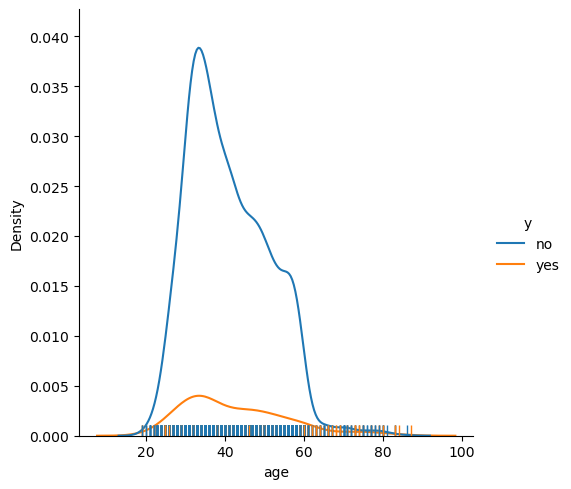

In [9]:
sns.displot(bank_df, x='age', kind='kde', rug=True, hue='y')

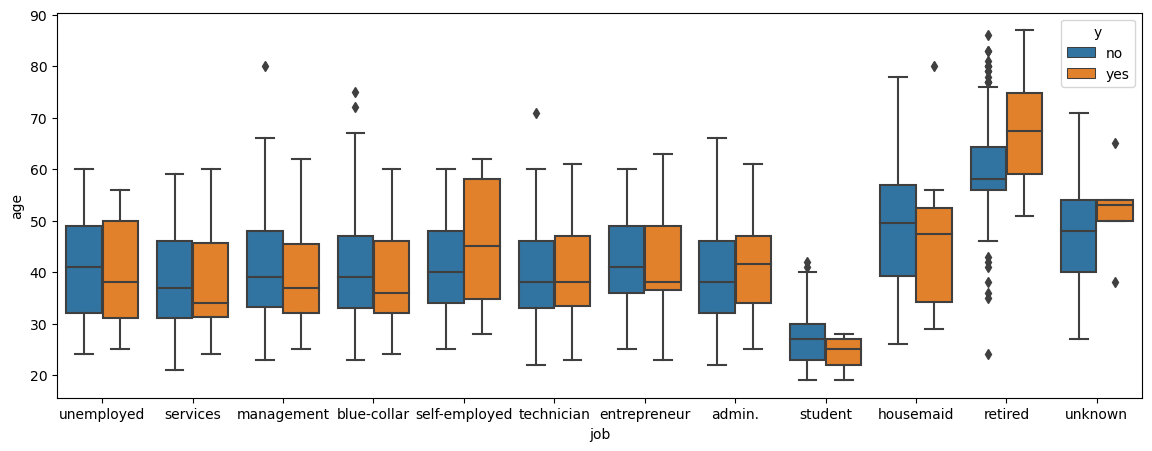

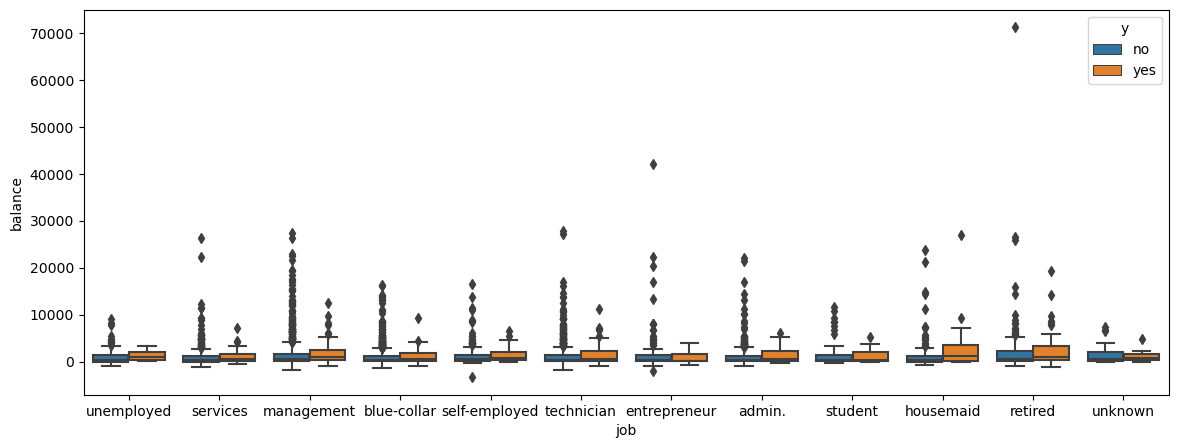

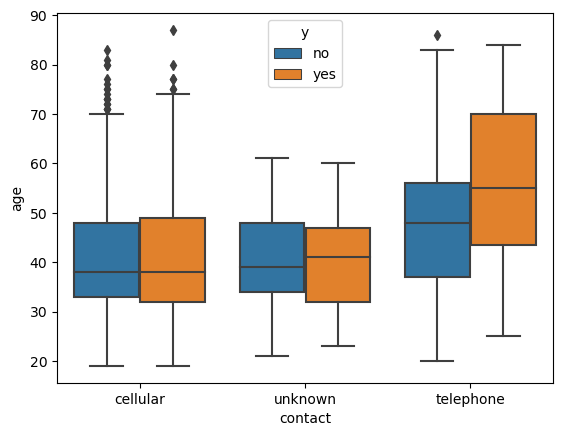

In [10]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='job', y='age', hue='y', data=bank_df)
plt.show()
plt.figure(figsize=(14, 5))
sns.boxplot(x='job', y='balance', hue='y', data=bank_df)
plt.show()
sns.boxplot(x='contact', y='age', hue='y', data=bank_df)
plt.show()

### Actionable insights
* Demographic Insights: We can target specific demographics based on age, job type, marital status, and education. For example, young clients may have different preferences than older ones.
* Campaign Analysis: The choice of contact communication type and the number of contacts may impact the success of the campaign. We can optimize these aspects to increase subscription rates.

### Adult Income Dataset: -
This dataset contains information about individuals, including features such as age, education, occupation, and income. The goal may be to predict whether an individual earns more than $50,000 per year.

* Data Science Perspective: From a data science perspective this dataset provides valuable information for a better undestanding of pay scales of different people depending on their marital status, education level, hrs worked per week etc. It can also be used to train machine learning models such as Logistic Regression to predict whether a person earns more than 50k per annum or not which can be used to create target audience data for a particular commodity.

* Web App: A web app from this dataset could help users understand the demographic of people who earn more or less than 50k per annum. This could be used by people to explore which occupations, education level and sectors could give them a higher pay scale.

In [11]:
# Importing dataset
adult_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
               "marital-status", "occupation", "relationship", "race", "sex", 
               "capital-gain", "capital-loss", "hours-per-week", 
               "native-country", "income"]
adult_df = pd.read_csv('adult/adult.data', names=adult_names)
adult_df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [12]:
adult_df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [13]:
adult_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<Axes: >

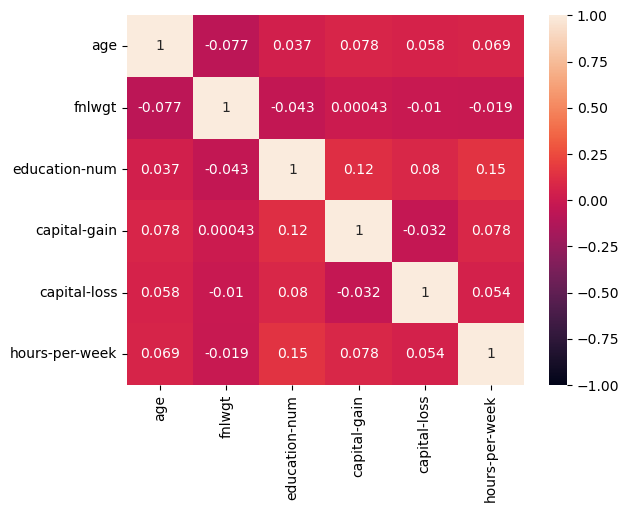

In [14]:
sns.heatmap(adult_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

/Users/pranitahuja/anaconda3/envs/cmse830/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


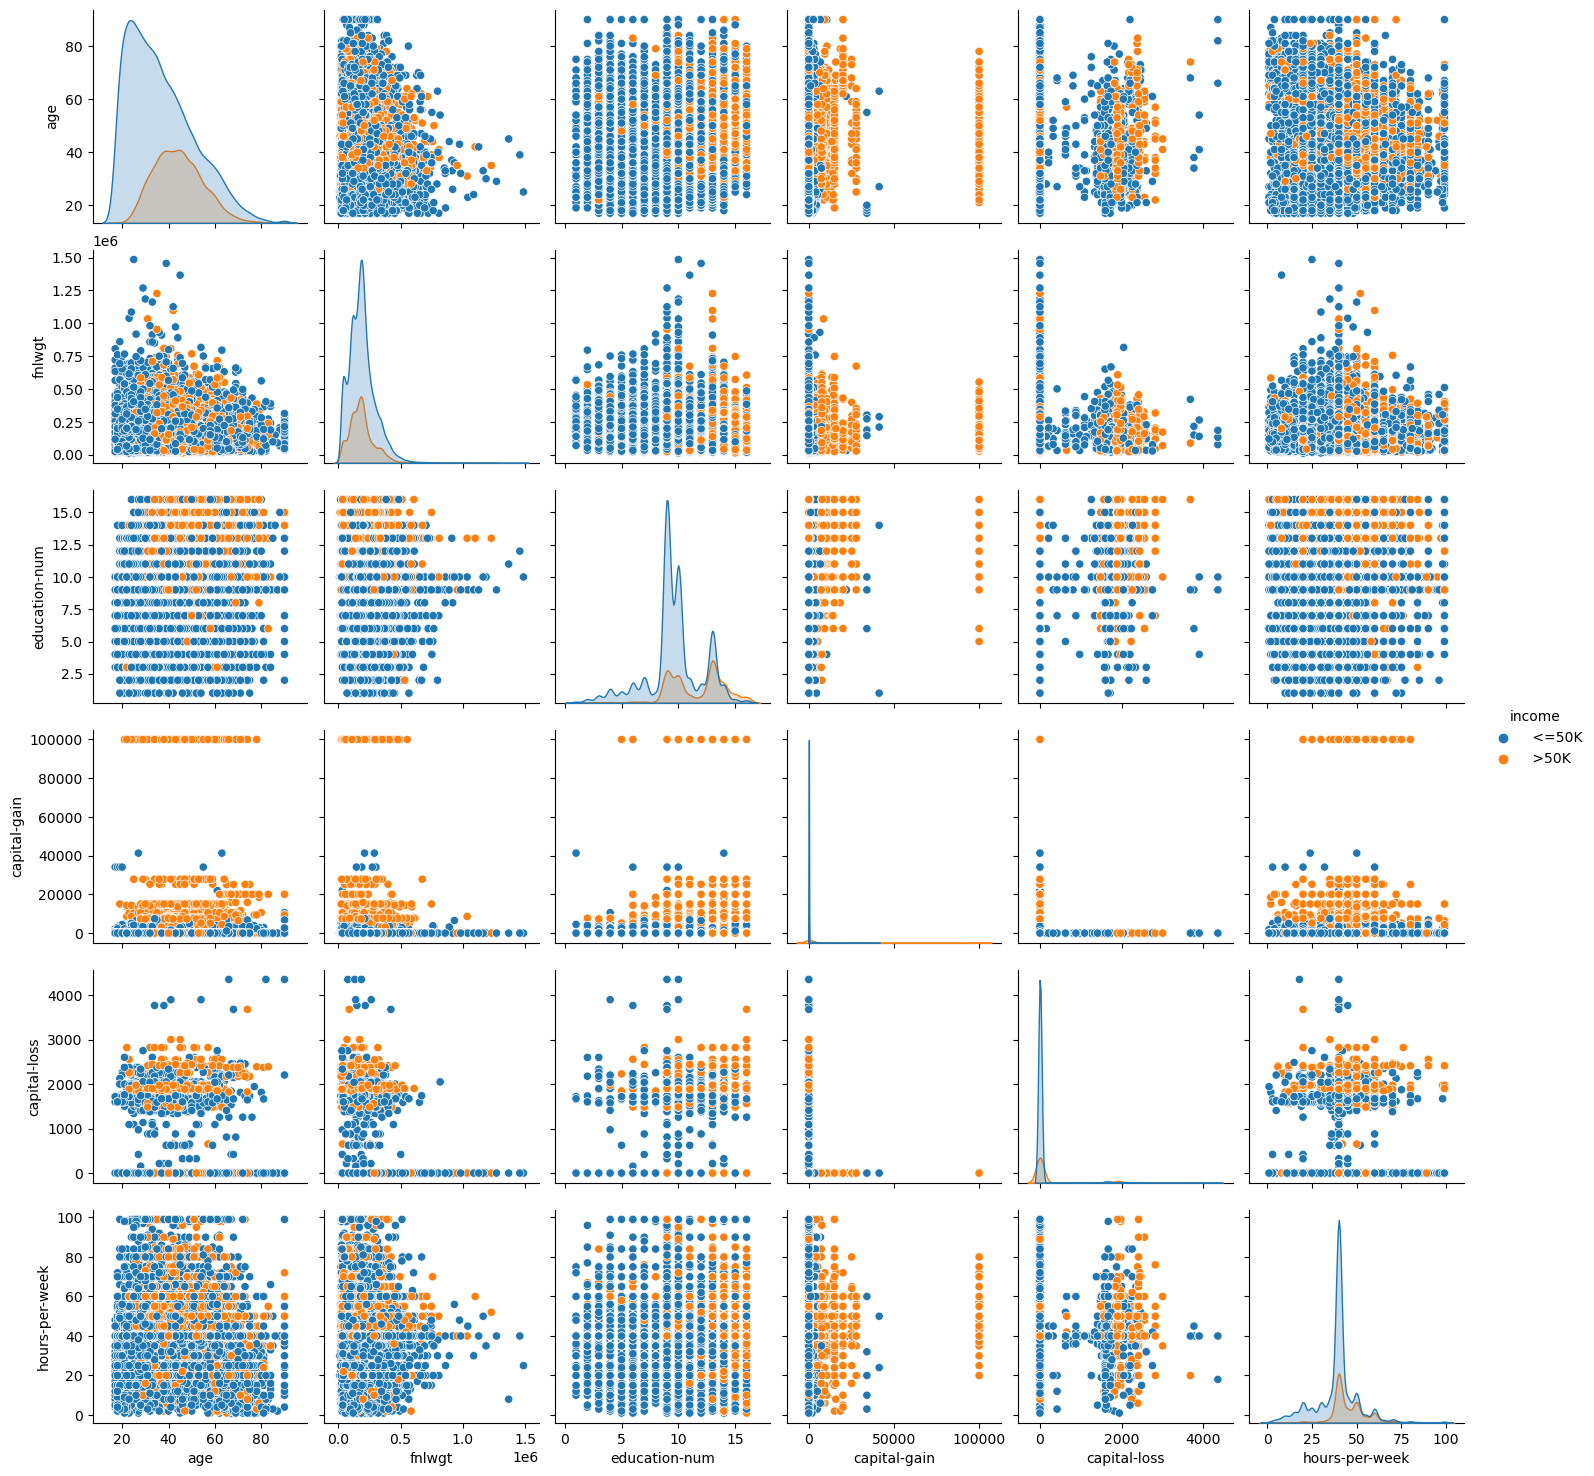

In [15]:
sns.pairplot(adult_df, hue='income')

<Axes: xlabel='sex', ylabel='count'>

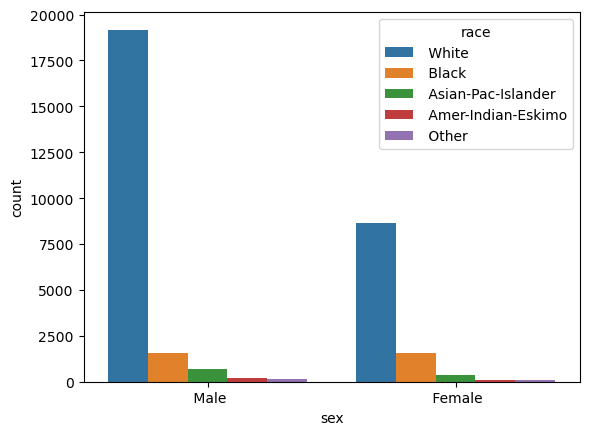

In [16]:
sns.countplot(data=adult_df, x='sex', hue='race')

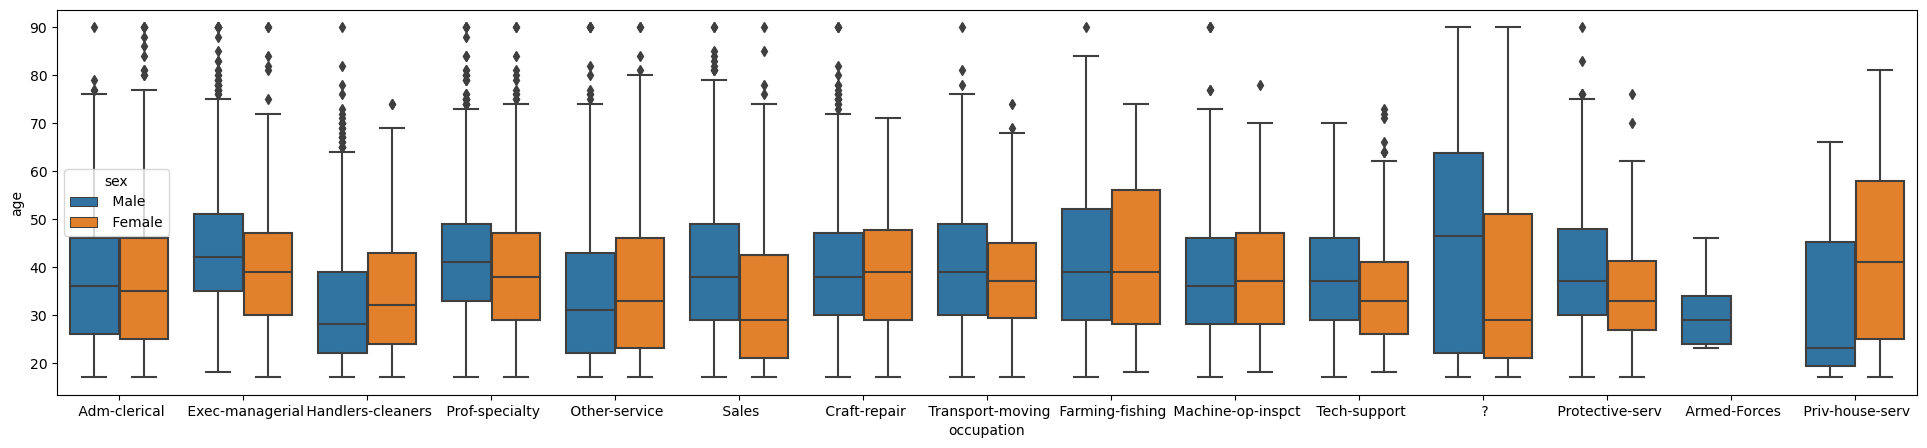

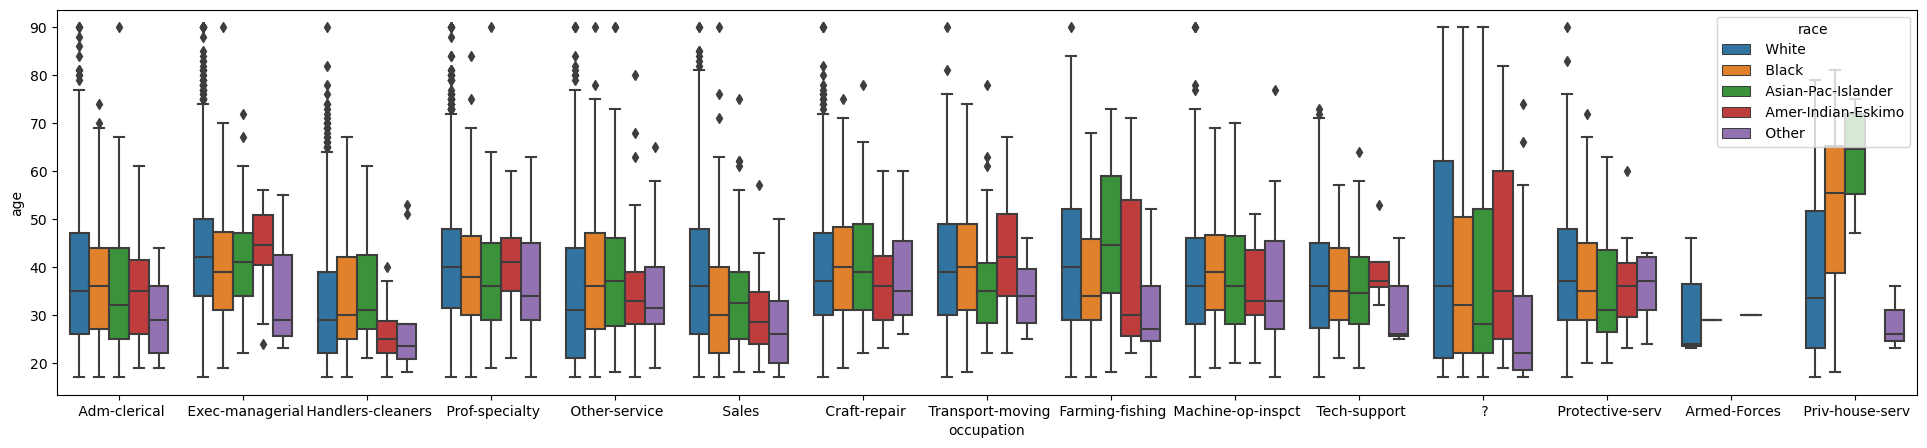

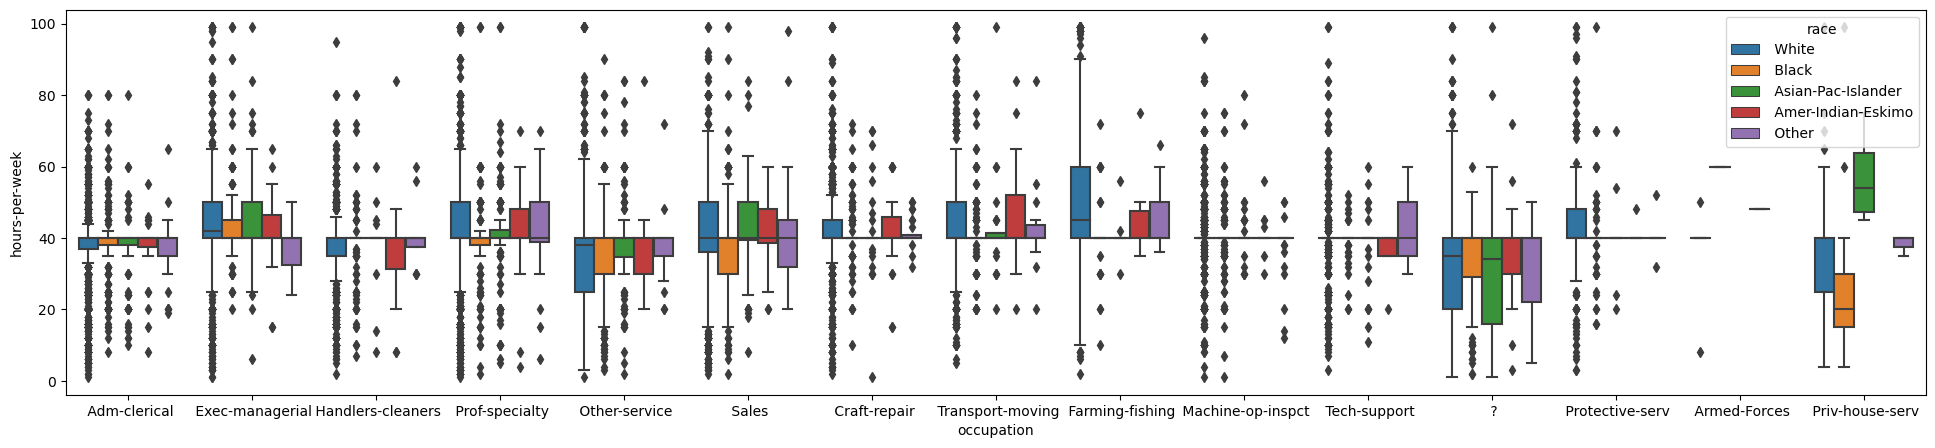

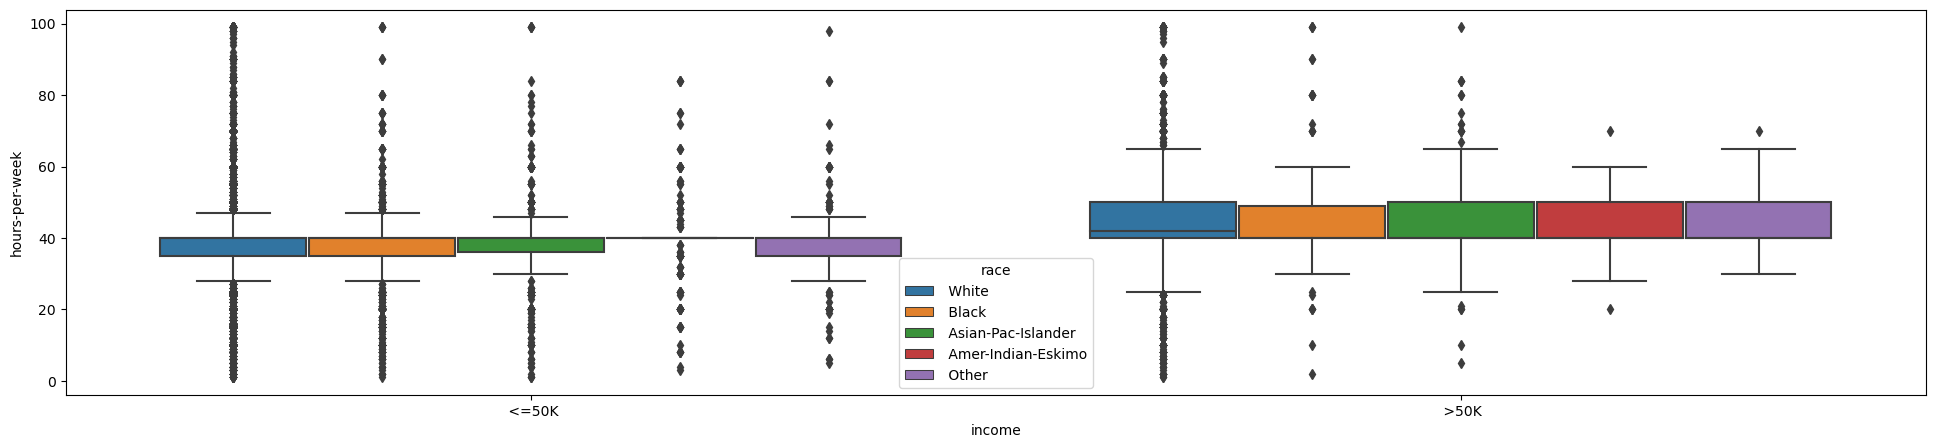

In [17]:
plt.figure(figsize=(24, 5))
sns.boxplot(x='occupation', y='age', hue='sex', data=adult_df)
plt.show()
plt.figure(figsize=(24, 5))
sns.boxplot(x='occupation', y='age', hue='race', data=adult_df)
plt.show()
plt.figure(figsize=(24, 5))
sns.boxplot(x='occupation', y='hours-per-week', hue='race', data=adult_df)
plt.show()
plt.figure(figsize=(24, 5))
sns.boxplot(x='income', y='hours-per-week', hue='race', data=adult_df)
plt.show()

### Actionable insights
* Demographic Insights: Understanding the demographics of the dataset, including age, education, occupation, and marital status, can help in targeting specific groups for marketing or policy decisions.
* Correlation Analysis: The correlation heatmap can help identify relationships between numeric features. For example, there may be a positive correlation between education and income, which can be used for further analysis.

### Online Retail Dataset: -
This dataset includes information about online orders placed by people from various countries, the quantity of each order and the unit price.

* Data Science Perspective: From a data science perspective this dataset provides valuable information for better marketing strategies and target audience. It can also be used to train machine learning models to predict the online ordering habits of people from these countries.

* Web App: A web app from this dataset could tell users about people from which countries place more online orders and which countries place the biggest or smallest orders which they could use to tailor their business to a specific audience.

In [18]:
online_df = pd.read_excel("Online Retail.xlsx")
online_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [19]:
online_df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [20]:
online_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
online_df.dropna(axis=0, inplace=True)
online_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: >

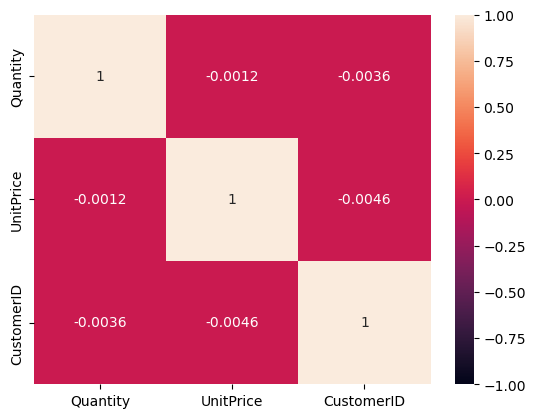

In [22]:
sns.heatmap(online_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

/Users/pranitahuja/anaconda3/envs/cmse830/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


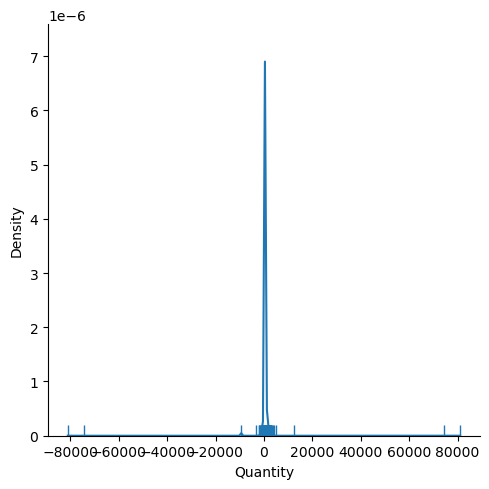

In [23]:
sns.displot(online_df, x='Quantity', kind='kde', rug=True)

## Actionable Insights
* Marketing: These insights can be used to start marketing campaigns during peak sales periods 
* Customers: Target customer countries that have higher purchases

____
![project](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)
## Problem #3 (5pts)

### <font color=#839383>more on Streamlit</font>

From the previous problem, choose your favorite dataset - the one you are liking to use for the midterm project. Build that into a very simple Streamlit app.

Do that by watching this video. Follow the video and build a web app as you are watching, but using the dataset you chose from the previous problem.

The goal is that you start to connect the narrative associated with the data to what the purpose of the web app might be.

If you are having any trouble with deploying Streamlit, please contact us on Slack.


### Web App Link: -


In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_Um12_OlGgw?si=pYR7WmeChe7Xxpq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it?
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?
4. define "missingness",
5. what are the three main types of missingness?
6. how is multiple imputation implemented?
7. what is mean substitution, and what can go wrong?
8. what is regression substitution, and what does it miss?
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR


* Imputation: Imputation refers to the process of replacing missing or incomplete data values with estimated or predicted values based on the available information. It is a statistical technique used to handle missing data in a dataset.

* Listwise Deletion: Listwise deletion, also known as complete-case analysis, is a method of handling missing data by removing any observations that have missing values for at least one variable. Two potential problems with using listwise deletion are:
    * a. Reduced Sample Size: It can significantly reduce the sample size, potentially leading to a loss of statistical power and representativeness.
    * b. Bias: If the missing data is not missing completely at random and there is a systematic reason for data being missing, listwise deletion can introduce bias into the analysis.

* Pairwise Deletion: Pairwise deletion is a method of handling missing data where each analysis involves only the available data for that specific analysis. It differs from listwise deletion in that it retains all cases for analyses where the data are complete but uses only the available data for each specific analysis. Problems with pairwise deletion include:
    * a. Inconsistent Sample Sizes: It can lead to different sample sizes for different analyses, making it challenging to compare results across analyses.
    * b. Correlation: As the missing values are removed from the dataset, the correlation might be inflated depending on the pattern of missing data which provides misleading information about the dataset.

* Missingness: Missingness refers to the condition where data values are absent or unavailable for some observations or variables within a dataset.

* Three Main Types of Missingness:
    * a. MCAR (Missing Completely at Random): When the probability of data being missing is unrelated to both observed and unobserved data. This is considered the least problematic type of missingness.
    * b. MAR (Missing at Random): When the probability of data being missing depends on observed data but not on unobserved data. MAR can be handled through appropriate statistical methods.
    * c. MNAR (Missing Not at Random): When the probability of data being missing depends on unobserved data, making it challenging to address using traditional imputation methods.

* Multiple Imputation: Multiple imputation is a technique used to handle missing data by creating multiple complete datasets with imputed values for missing data. It involves three main steps: imputing missing values multiple times, analyzing each imputed dataset separately, and then combining the results to provide valid and unbiased estimates.

* Mean Substitution: Mean substitution involves replacing missing values with the mean value of the observed data for that variable. It can go wrong because it doesn't capture the variability in the data and can distort the distribution of the variable, potentially leading to incorrect inferences.

* Regression Substitution: Regression substitution is a method where missing values are replaced with predicted values from a regression model using other available variables. It may miss important nonlinear relationships in the data and assumes that the regression model accurately represents the missing data mechanism.

* Stochastic Regression: Stochastic regression is a method that addresses the limitations of deterministic regression substitution by introducing random variability into the imputed values. It accounts for uncertainty in the imputed values and provides a more realistic representation of missing data.

* Ranking from Best to Worst:
    * a. MCAR (Missing Completely at Random): Best, as it implies that the missingness is unrelated to both observed and unobserved data.
    * b. MAR (Missing at Random): Next, as it allows for systematic relationships with observed data, which can be accounted for in analysis.
    * c. MNAR (Missing Not at Random): Worst, as it indicates that missingness depends on unobserved data, making it challenging to handle and potentially leading to biased results.

___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression).

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots.

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions".

✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot.

Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information.

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do.

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

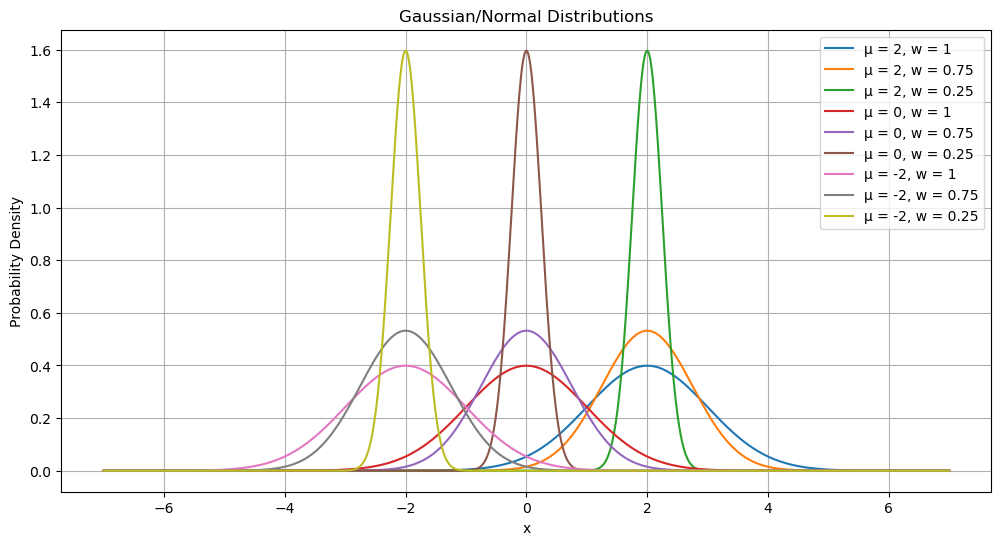

In [52]:
x = np.linspace(-7, 7, 1000)

#values of mean (mu) and sd (sigma)
mean = [2, 0, -2]
sd = [1, 0.75, 0.25]

plt.figure(figsize=(12, 6))
plt.title('Gaussian/Normal Distributions')

for m in mean:
    for s in sd:
        gaussian = (1 / (s * np.sqrt(2 * np.pi))) * np.exp(-(x - m)**2 / (2 * s**2))
        label = f"μ = {m}, w = {s}"
        plt.plot(x, gaussian, label=label)

plt.legend()
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

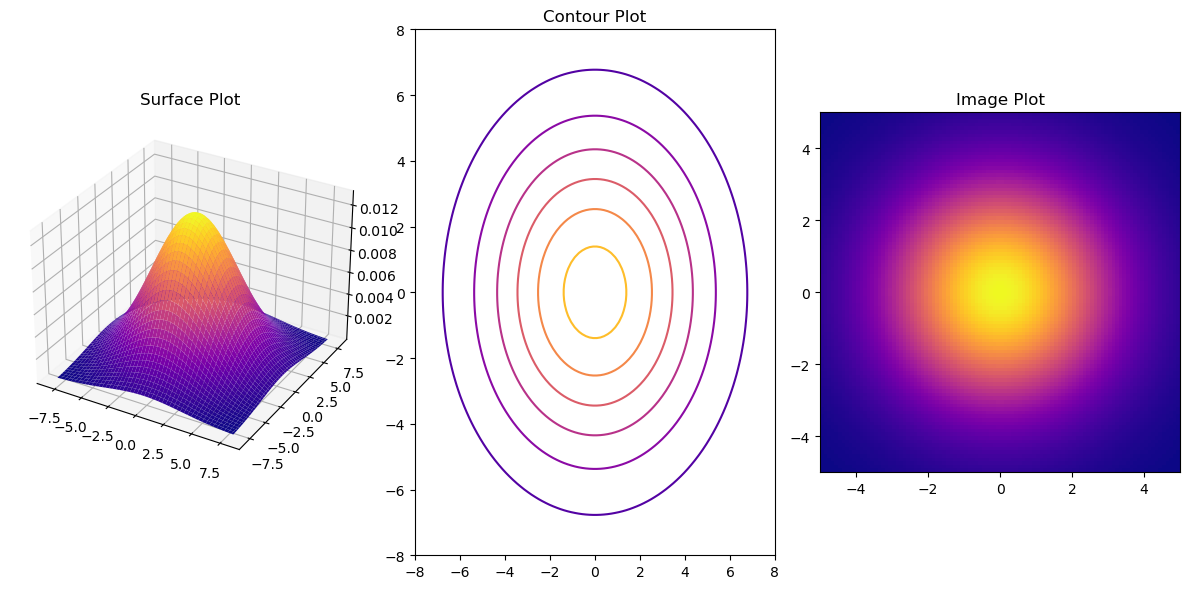

In [70]:
mean_x = 0
mean_y = 0
sd_x = 3.5
sd_y = 3.5
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x, y)

# Bivariate Gaussian function
Z = (1 / (sd_x * sd_y * 2 * np.pi)) * np.exp(
    -((X - mean_x)**2 / (2 * sd_x**2) + (Y - mean_y)**2 / (2 * sd_y**2)))

# Surface plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_title('Surface Plot')

# Contour plot
plt.subplot(132)
plt.contour(X, Y, Z, cmap='plasma')
plt.title('Contour Plot')

# Image plot
plt.subplot(133)
plt.imshow(Z, extent=[-5, 5, -5, 5], cmap='plasma', origin='lower')
plt.title('Image Plot')

plt.tight_layout()
plt.show()

In [ ]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

mx = 2
my = 3.5
wx= 0.6
wy= 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

In [ ]:
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information?

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

/Users/pranitahuja/anaconda3/envs/cmse830/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pranitahuja/anaconda3/envs/cmse830/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


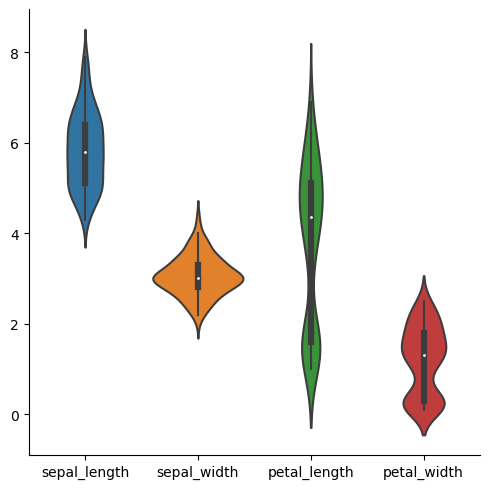

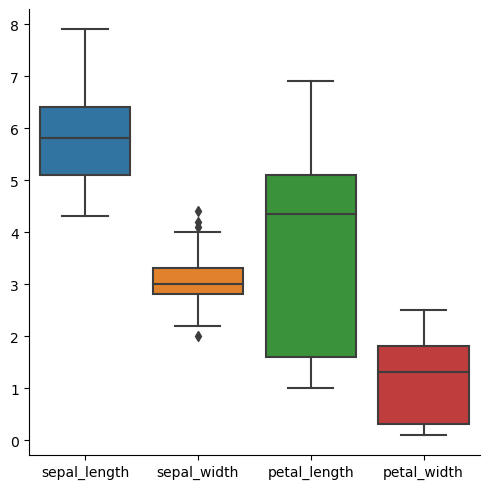

In [44]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")
sns.catplot(data=df_iris, kind="box")

* The shapes above are boxplot and violin plot

### Violin Plot:
* A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.
#### Here's what the violin plot reveals:
* Shape: The violin plot displays a series of mirrored violin-shaped distributions, one for each category or class in the "iris" dataset (e.g., different species of iris flowers: setosa, versicolor, virginica).
* Width: The width of each violin represents the data density at different values. Wider sections indicate higher data density.
* Box inside the Violin: The box plot inside each violin provides summary statistics, such as the median, quartiles, and potential outliers.

### Box Plot:
* A box plot displays summary statistics for a dataset.
#### Here's what the box plot reveals:
* Box: The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median (50th percentile).
* Whiskers: The whiskers extend to the minimum and maximum values within a certain range or to the actual data points if they are not considered outliers.
* Outliers: Data points outside the whiskers are typically considered outliers and are plotted individually.

### Comparison:
* Both plots provide information on data distribution and help identify patterns and outliers.
* Box plot is good for finding central tendencies and outliers quickly as it is more compact and concentrates on summary statistics.
* The violin plot provides detailed perspective of the data distribution, including the probability density at various values.